<a href="https://www.kaggle.com/code/saidhamedsaidmohamed/diwali-sales-analysis?scriptVersionId=194197912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv


# Diwali sales analysis

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Reading and Cleaning Data

In [3]:
df=pd.read_csv('/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv',encoding='unicode_escape')

In [4]:
df.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
10653,1002136,Lacy,P00183342,M,36-45,45,1,Karnataka,Southern,Food Processing,Pet Care,4,2150.0,NaN,NaN
1039,1002173,Kritika,P00302642,F,51-55,54,1,Uttar Pradesh,Central,Healthcare,Footwear & Shoes,4,16920.0,NaN,NaN
3454,1005762,Yoseph,P00259342,M,36-45,42,1,Delhi,Central,Govt,Food,3,11756.0,NaN,NaN
6740,1001697,Nathan,P00220242,M,18-25,23,0,Punjab,Northern,Healthcare,Clothing & Apparel,4,7192.0,NaN,NaN
9241,1001358,Jaydeep,P00160642,F,36-45,44,0,Delhi,Central,Healthcare,Beauty,4,4448.0,NaN,NaN


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.shape


(11251, 15)

In [7]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.duplicated().sum()

8

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11243
unnamed1            11243
dtype: int64

In [13]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [14]:
df.Amount=df.Amount.fillna(df.Amount.median())

In [15]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11243 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11243 non-null  int64  
 1   Cust_name         11243 non-null  object 
 2   Product_ID        11243 non-null  object 
 3   Gender            11243 non-null  object 
 4   Age Group         11243 non-null  object 
 5   Age               11243 non-null  int64  
 6   Marital_Status    11243 non-null  int64  
 7   State             11243 non-null  object 
 8   Zone              11243 non-null  object 
 9   Occupation        11243 non-null  object 
 10  Product_Category  11243 non-null  object 
 11  Orders            11243 non-null  int64  
 12  Amount            11243 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [17]:
df.Amount=df.Amount.astype(int)

## 3.Exploratory Data Analysis


In [18]:
for col in df.columns:
    print(col,":",df[col].nunique())

User_ID : 3755
Cust_name : 1250
Product_ID : 2351
Gender : 2
Age Group : 7
Age : 81
Marital_Status : 2
State : 16
Zone : 5
Occupation : 15
Product_Category : 18
Orders : 4
Amount : 6583


In [19]:
df_int=df.select_dtypes(include=['int64','float64'])
df_int

,User_ID,Age,Marital_Status,Orders,Amount
0,1002903,28,0,1,23952
1,1000732,35,1,3,23934
2,1001990,35,1,3,23924
3,1001425,16,0,2,23912
4,1000588,28,1,2,23877
...,...,...,...,...,...
11246,1000695,19,1,4,370
11247,1004089,33,0,3,367
11248,1001209,40,0,4,213
11249,1004023,37,0,3,206


In [20]:
co=df_int.corr()
co

,User_ID,Age,Marital_Status,Orders,Amount
User_ID,1.000000,0.022581,0.004942,-0.016220,-0.012126
Age,0.022581,1.000000,-0.012430,0.008033,0.030201
Marital_Status,0.004942,-0.012430,1.000000,-0.003449,-0.017913
Orders,-0.016220,0.008033,-0.003449,1.000000,-0.012533
Amount,-0.012126,0.030201,-0.017913,-0.012533,1.000000


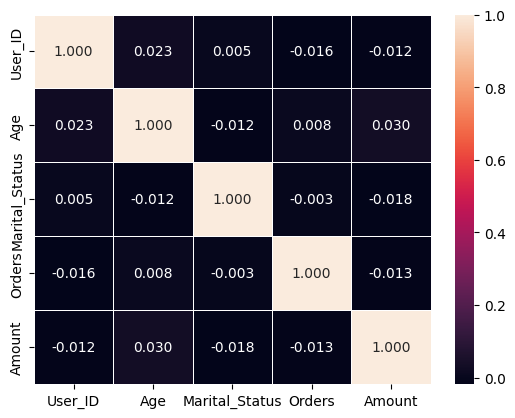

In [21]:
sns.heatmap(co,lw='0.5',annot=True,fmt=".3f")
plt.show()

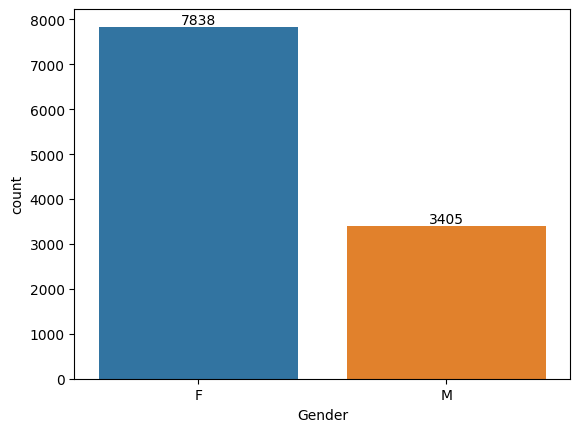

In [22]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

In [23]:
AM_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
AM_gen


,Gender,Amount
0,F,74388769
1,M,31887364


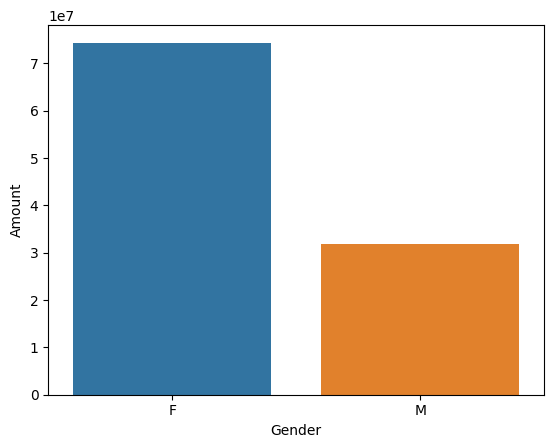

In [24]:
sns.barplot(x='Gender',y='Amount',data=AM_gen)
plt.show()

### majority of female purchasers

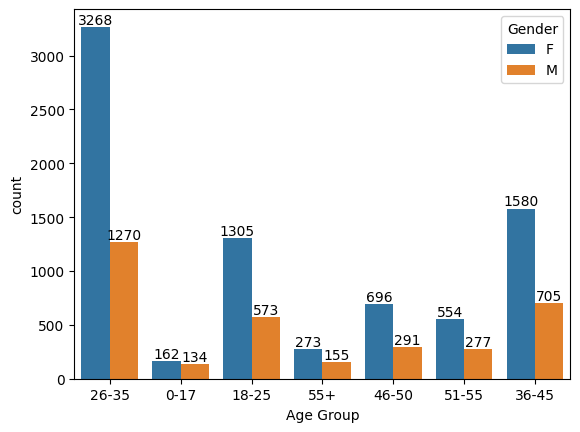

In [25]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Most of the buyers are between the age of 26 to 35 and the most are females

In [26]:
AM_age =df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
AM_age

,Age Group,Amount
2,26-35,42597985
3,36-45,22159462
1,18-25,17235530
4,46-50,9240280
5,51-55,8254127
6,55+,4089096
0,0-17,2699653


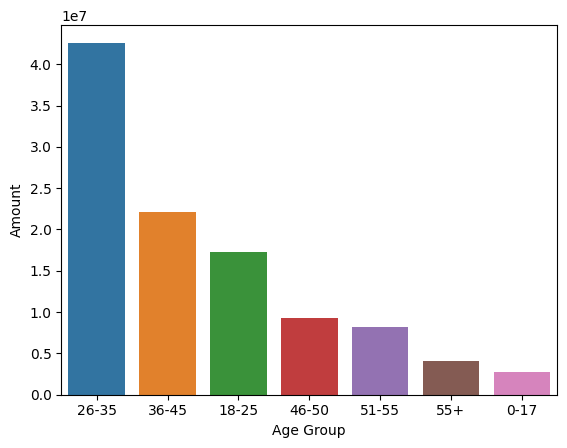

In [27]:
sns.barplot(x='Age Group',y='Amount',data=AM_age)
plt.show()

In [28]:
ord_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)[:10]
ord_state

,State,Orders
14,Uttar Pradesh,4809
10,Maharashtra,3799
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1067


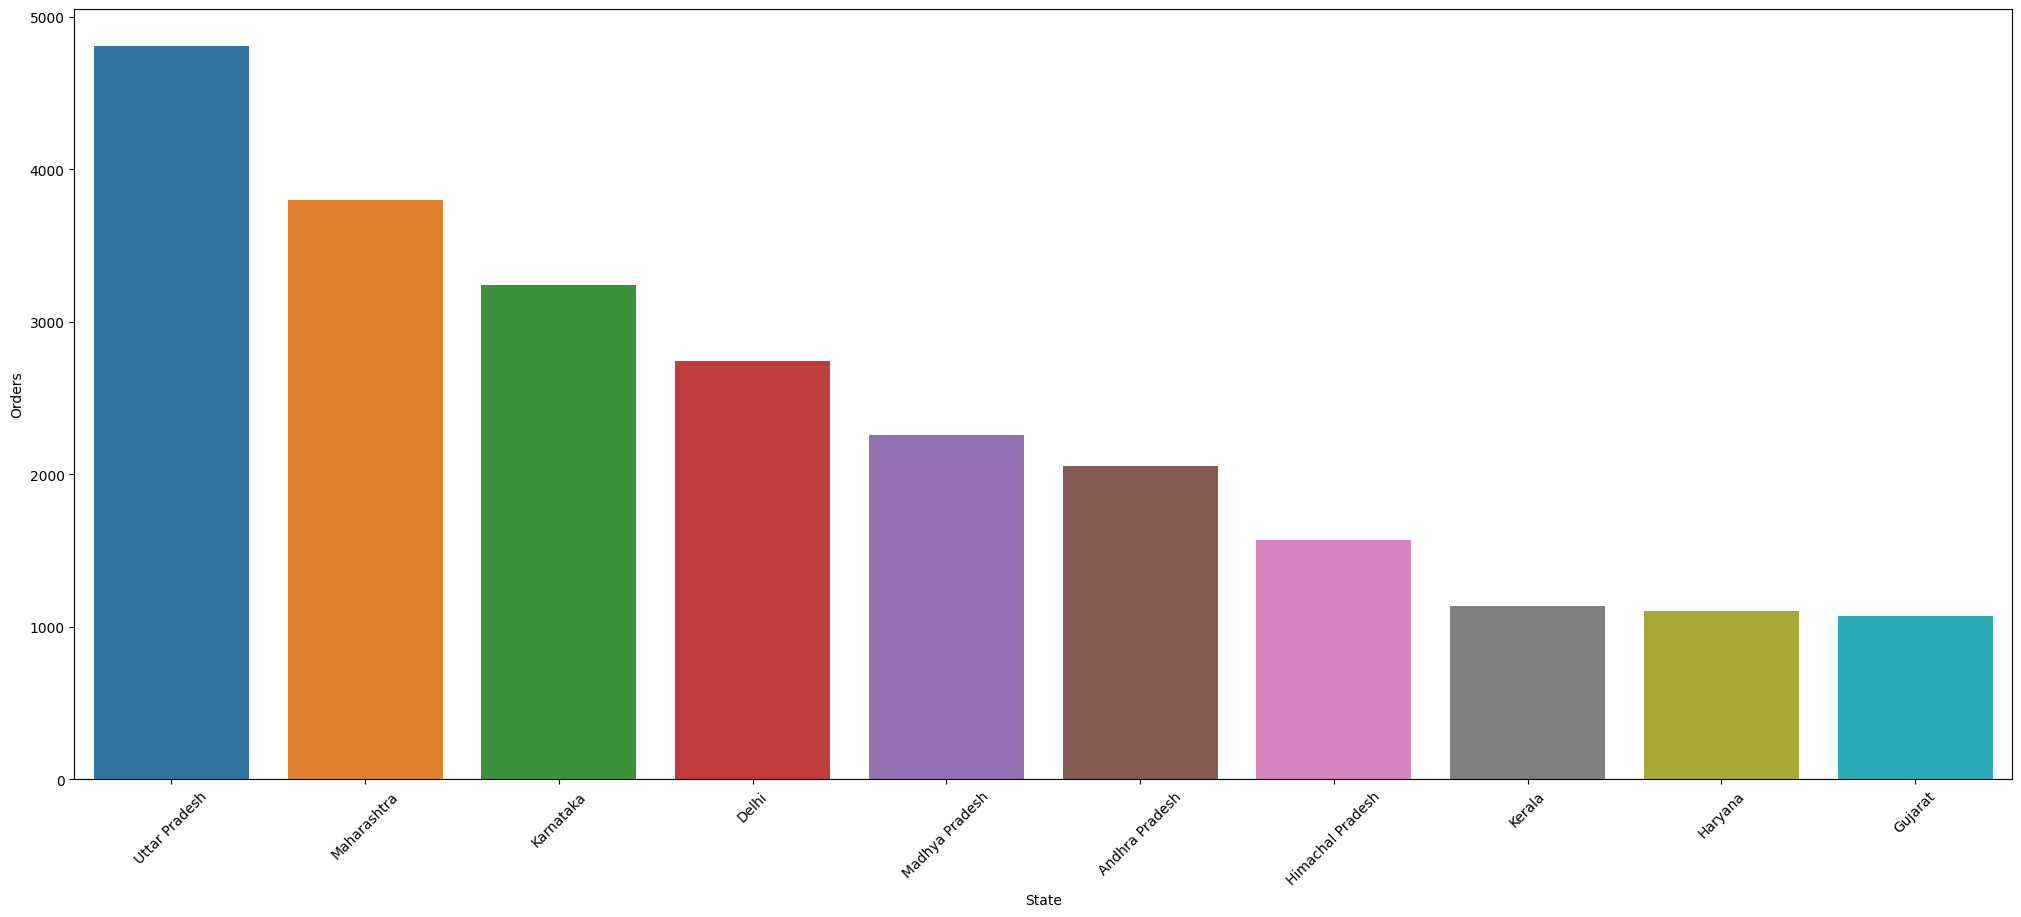

In [29]:
plt.figure(figsize=(25,10))
sns.barplot(data=ord_state,x='State',y='Orders')
plt.xticks(rotation=45)
plt.show()

### Most of the orders are from :
### (Uttar Pradesh), then
### (Maharashtra) and then
### (Karnataka)


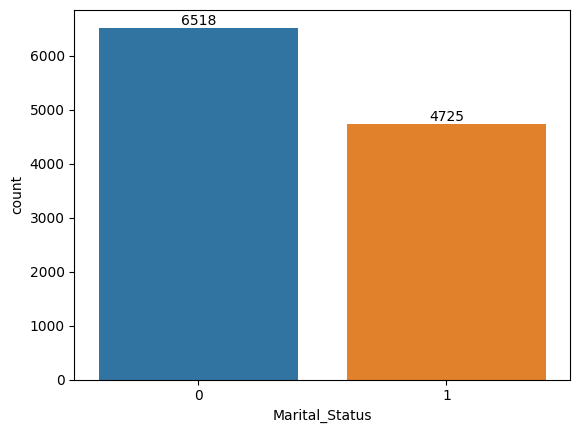

In [30]:
ax = sns.countplot(x='Marital_Status',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

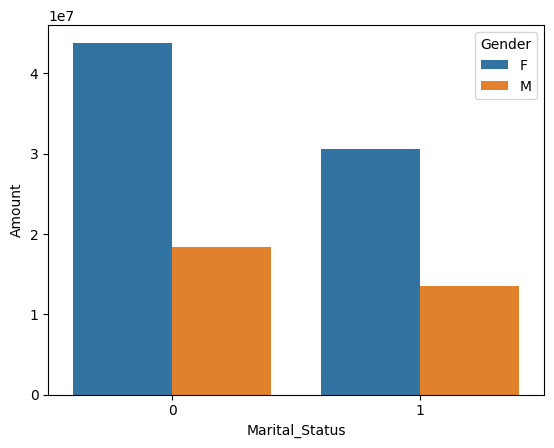

In [31]:
marital_amount = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=marital_amount,x='Marital_Status',y='Amount',hue='Gender')
plt.show()


### the most of the buyers are married(women) and they have high purchasing power.

In [32]:
occu_amount = df.groupby(['Occupation',], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
occu_amount

,Occupation,Amount
10,IT Sector,14782407
8,Healthcare,13034586
2,Aviation,12599994
3,Banking,10786828
7,Govt,8517212
9,Hospitality,6353851
12,Media,6295832
1,Automobile,5376705
4,Chemical,5305545
11,Lawyer,4981665


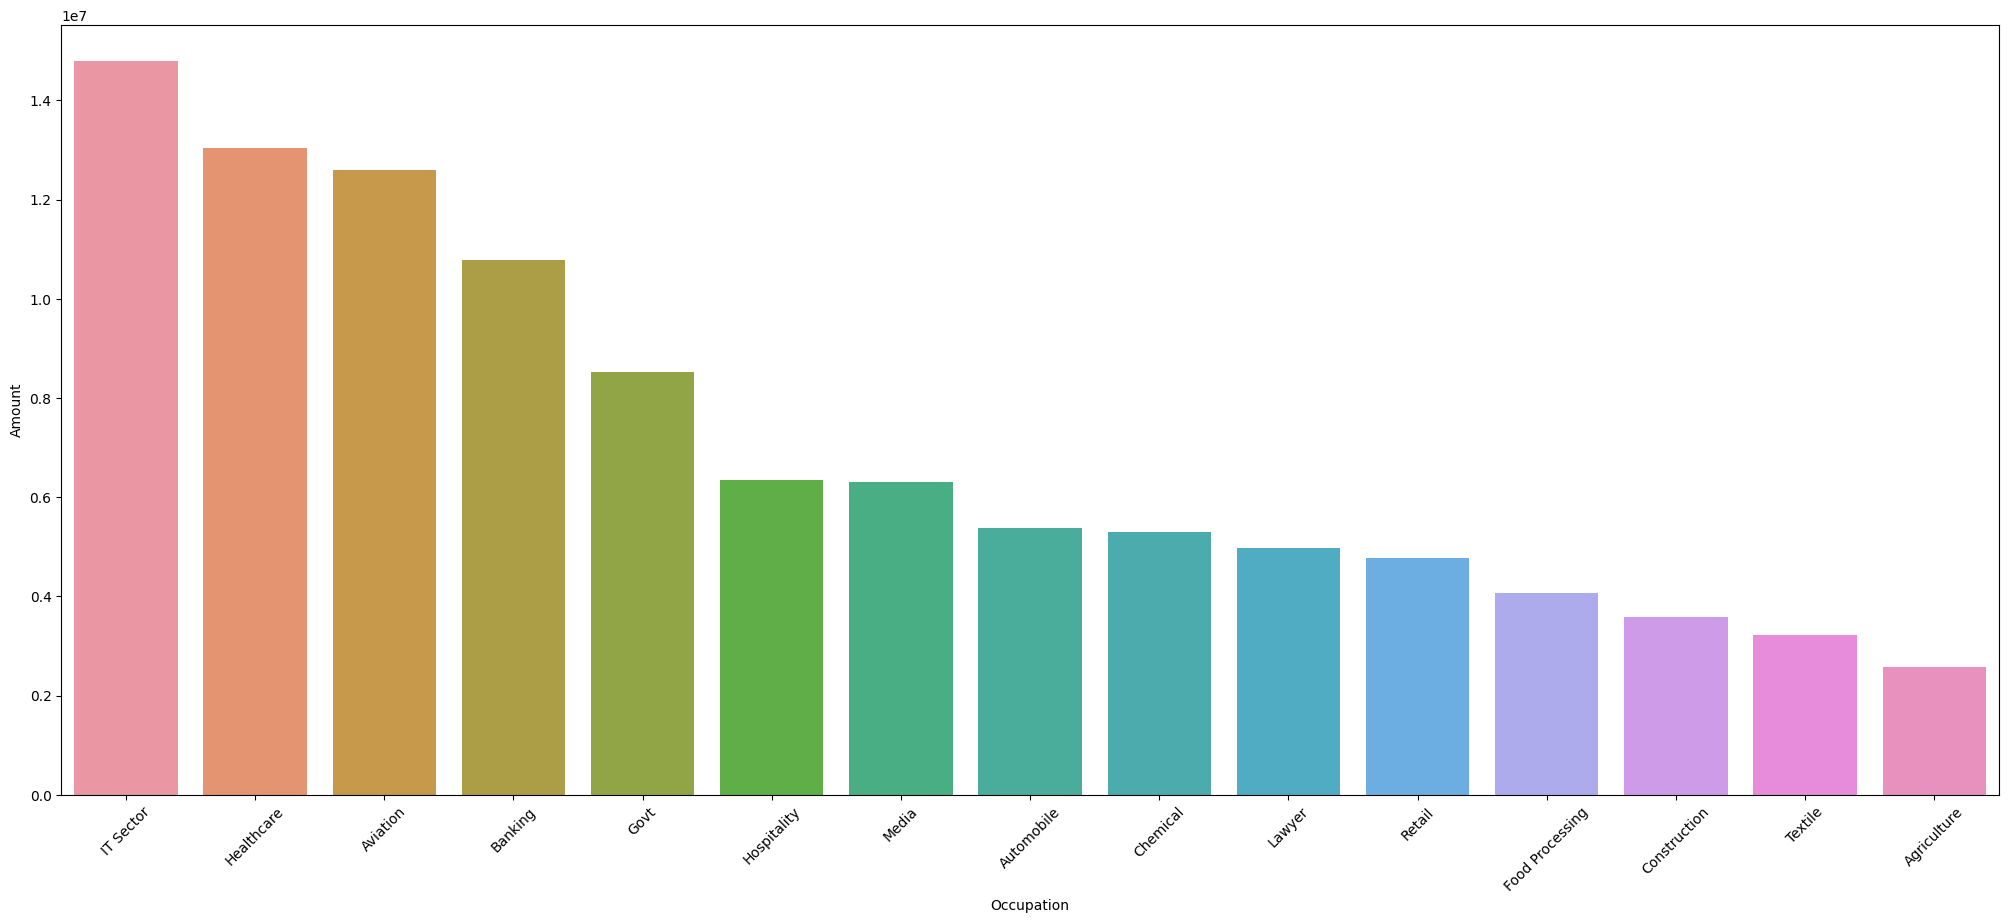

In [33]:
plt.figure(figsize=(25,10))
sns.barplot(data=occu_amount,x='Occupation',y= 'Amount')
plt.xticks(rotation=45)
plt.show()

### the most of the buyers are from IT, HealthCare and Aviation Sector

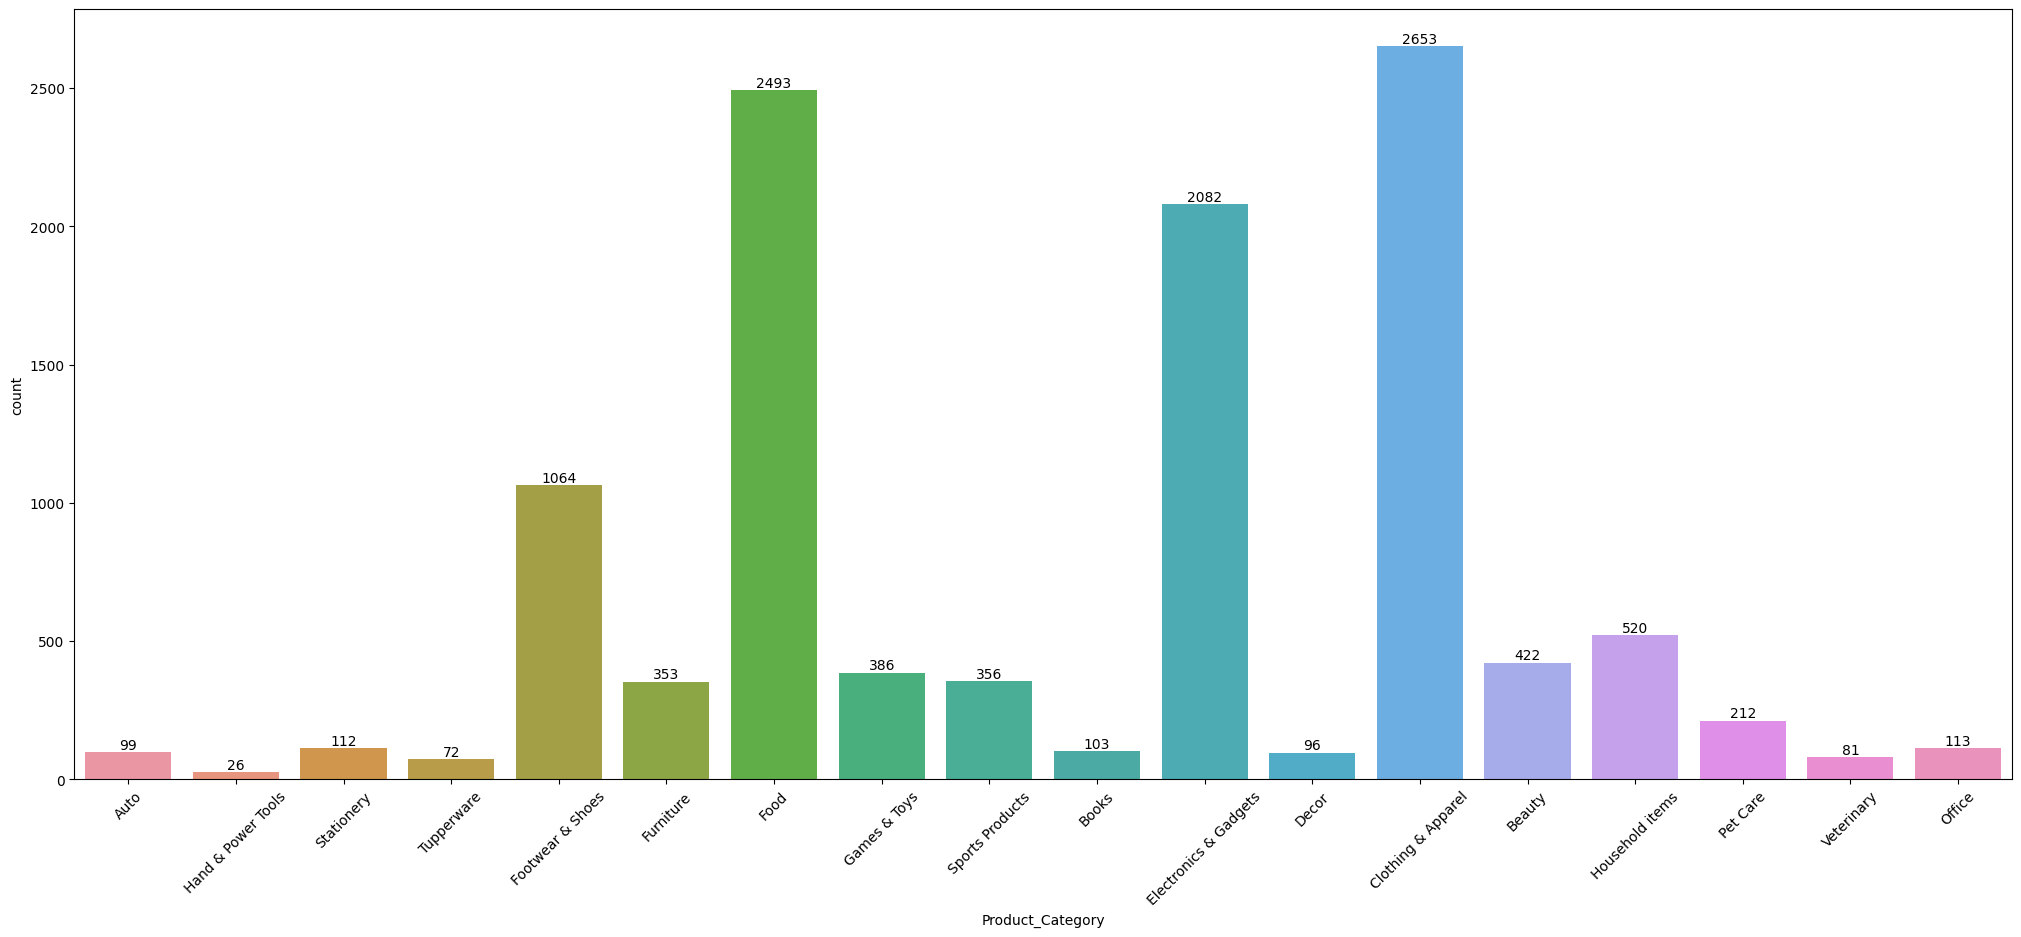

In [34]:
plt.figure(figsize=(25,10))
ax = sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)

In [35]:
cat_amount = df.groupby(['Product_Category',], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)[:10]
cat_amount

,Product_Category,Amount
6,Food,33958210
3,Clothing & Apparel,16484472
7,Footwear & Shoes,15615754
5,Electronics & Gadgets,15607657
8,Furniture,5448160
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1959368
15,Stationery,1676051


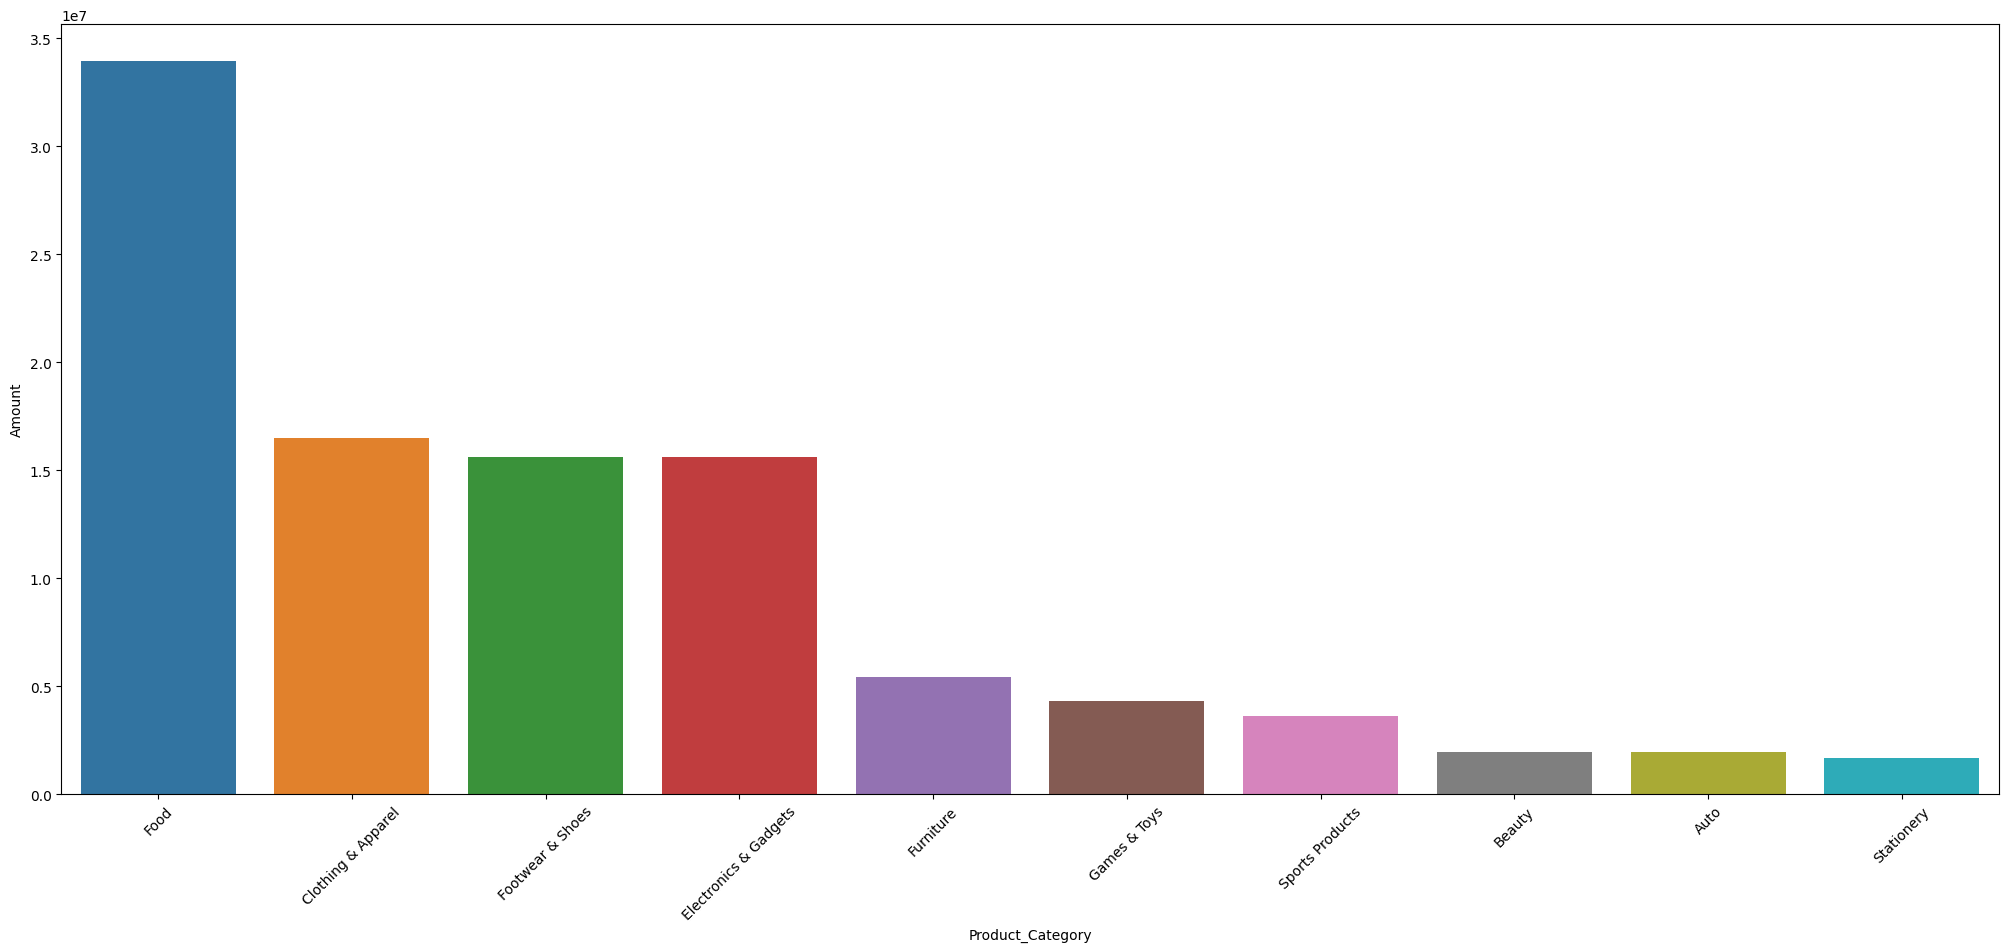

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(data=cat_amount,x='Product_Category',y= 'Amount')
plt.xticks(rotation=45)
plt.show()

### the most of the sold products are from *food*, *clothing*, and *Electronics catagory*.

## Conclusion
##### According to the analyzed data it can be determined that Female individuals who are married and aged between 26 and 35 years and who work within the Information Technology, Healthcare, and Aviation sectors in the states of Uttar Pradesh, Maharashtra, and Karnataka, have a higher propensity to purchase products from the categories of Food, Clothing, and Electronics.

## Project Learnings

##### - Executed data cleaning and manipulation procedures.
##### - Conducted exploratory data analysis (EDA) utilizing the pandas, matplotlib, and seaborn libraries.
##### - Enhanced the customer experience by identifying prospective customers among diverse states, occupations, genders, and age groups.
##### - Boosted sales by identifying the highest selling product categories and products, thereby facilitating inventory planning to meet demand.